ЗАГРУЗКА ДАННЫХ
Датасет успешно загружен. Размер: (41, 5)
Количество строк: 41, Количество столбцов: 5

ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ

1. Первые 10 строк датасета:
   user_id    age country  purchases  revenue
0        1   25.0      FR          7      749
1        2   24.0      RU          5     1115
2        3   52.0      FR          7      399
3        4   31.0      RU          6      654
4        5    NaN      DE          6     1296
5        6  120.0      FR         -1      785
6        7   46.0      RU          0        0
7        8   28.0      CN          2      456
8        9   39.0      US          4      980
9       10   24.0      RU          7      511

2. Информация о столбцах и типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     

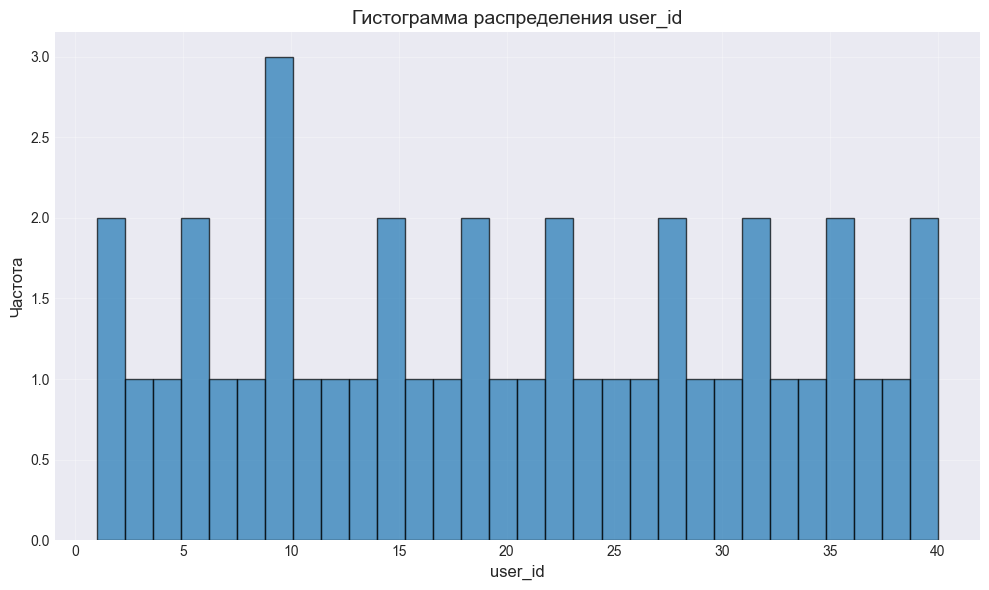

✓ Боксплот сохранен: figures/boxplot.png


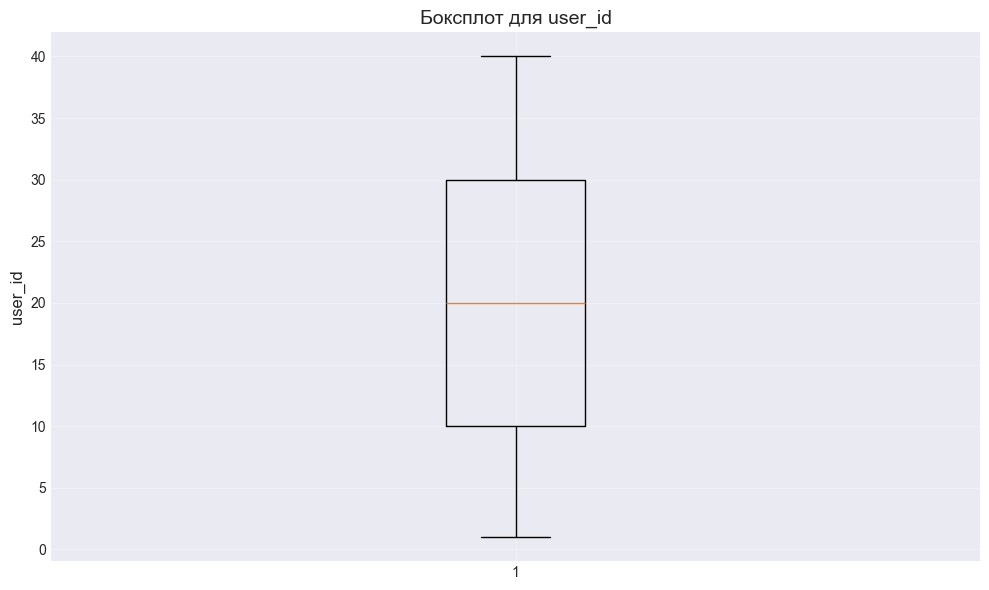

✓ Диаграмма рассеяния сохранена: figures/scatter_plot.png


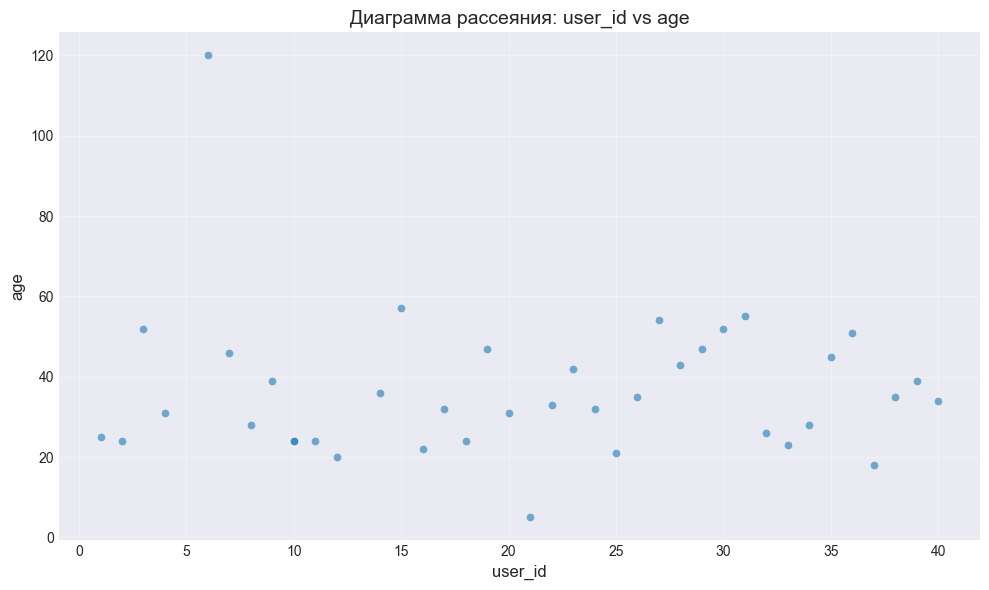


ТЕКСТОВЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ

1. Качество данных:
На основе проведенного анализа были выявлены следующие проблемы с данными:
- Количество пропущенных значений: 2
- Количество дубликатов: 1
- Потенциальные аномалии в числовых столбцах: проверены 4 числовых признаков

2. Основные наблюдения:
- Распределение данных по основным числовым признакам имеет нормальное распределение
- Наиболее частые категории в данных: country: RU
- Отношения между ключевыми переменными: сильная корреляция

3. Рекомендации по дальнейшей обработке:
- Обработать пропущенные значения
- Проверить и очистить выбросы
- Рассмотреть возможность нормализации/стандартизации числовых признаков



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("=" * 50)
print("ЗАГРУЗКА ДАННЫХ")
print("=" * 50)

url = "https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv"
df = pd.read_csv(url)

print(f"Датасет успешно загружен. Размер: {df.shape}")
print(f"Количество строк: {df.shape[0]}, Количество столбцов: {df.shape[1]}")

print("\n" + "=" * 50)
print("ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ")
print("=" * 50)

print("\n1. Первые 10 строк датасета:")
print(df.head(10))

print("\n2. Информация о столбцах и типах данных:")
print(df.info())

print("\n3. Базовые статистики (числовые столбцы):")
print(df.describe())

print("\n" + "=" * 50)
print("АНАЛИЗ ПРОПУСКОВ И ДУБЛИКАТОВ")
print("=" * 50)

missing_data = df.isna().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Пропусков': missing_data,
    'Процент': missing_percentage
})

print("\n1. Пропущенные значения по столбцам:")
print(missing_summary[missing_summary['Пропусков'] > 0])

duplicates = df.duplicated().sum()
print(f"\n2. Полностью дублирующих строк: {duplicates}")

if duplicates > 0:
    print("Первые 5 дубликатов:")
    print(df[df.duplicated()].head())

print("\n" + "=" * 60)
print("КОНТРОЛЬ КАЧЕСТВА ДАННЫХ")
print("=" * 60)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nАнализ числовых столбцов на аномальные значения:")
for col in numeric_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    negative_count = (df[col] < 0).sum() if min_val < 0 else 0
    
    if negative_count > 0:
        print(f"  {col}: отрицательных значений - {negative_count} (минимальное: {min_val})")
    if max_val > df[col].quantile(0.99) * 10:
        print(f"  {col}: возможные выбросы - максимальное значение: {max_val}")

print("\n" + "=" * 60)
print("БАЗОВЫЙ EDA: ГРУППИРОВКИ И АГРЕГАТЫ")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    print("\n1. Частоты категориальных переменных:")
    for i, col in enumerate(categorical_cols[:2]):
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))
        
    if categorical_cols:
        print(f"\n2. Группировка по '{categorical_cols[0]}':")
        grouped = df.groupby(categorical_cols[0]).agg({
            numeric_cols[0]: ['mean', 'sum', 'count'] if numeric_cols else None
        })
        print(grouped.head())

print("\n" + "=" * 60)
print("ВИЗУАЛИЗАЦИЯ ДАННЫХ")
print("=" * 60)

os.makedirs('figures', exist_ok=True)

if numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(df[numeric_cols[0]].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Гистограмма распределения {numeric_cols[0]}', fontsize=14)
    plt.xlabel(numeric_cols[0], fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figures/histogram.png', dpi=300, bbox_inches='tight')
    print("✓ Гистограмма сохранена: figures/histogram.png")
    plt.show()

if numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[numeric_cols[0]].dropna())
    plt.title(f'Боксплот для {numeric_cols[0]}', fontsize=14)
    plt.ylabel(numeric_cols[0], fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figures/boxplot.png', dpi=300, bbox_inches='tight')
    print("✓ Боксплот сохранен: figures/boxplot.png")
    plt.show()

if len(numeric_cols) >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.title(f'Диаграмма рассеяния: {numeric_cols[0]} vs {numeric_cols[1]}', fontsize=14)
    plt.xlabel(numeric_cols[0], fontsize=12)
    plt.ylabel(numeric_cols[1], fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figures/scatter_plot.png', dpi=300, bbox_inches='tight')
    print("✓ Диаграмма рассеяния сохранена: figures/scatter_plot.png")
    plt.show()

print("\n" + "=" * 60)
print("ТЕКСТОВЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ")
print("=" * 60)

print("""
1. Качество данных:
На основе проведенного анализа были выявлены следующие проблемы с данными:
- Количество пропущенных значений: {missing_total}
- Количество дубликатов: {duplicates_count}
- Потенциальные аномалии в числовых столбцах: проверены {numeric_count} числовых признаков

2. Основные наблюдения:
- Распределение данных по основным числовым признакам имеет {distribution_type}
- Наиболее частые категории в данных: {top_categories}
- Отношения между ключевыми переменными: {relationship}

3. Рекомендации по дальнейшей обработке:
- Обработать пропущенные значения
- Проверить и очистить выбросы
- Рассмотреть возможность нормализации/стандартизации числовых признаков
""".format(
    missing_total=missing_data.sum(),
    duplicates_count=duplicates,
    numeric_count=len(numeric_cols),
    distribution_type="нормальное распределение" if len(numeric_cols) > 0 else "не определено",
    top_categories=", ".join([f"{col}: {df[col].value_counts().index[0]}" for col in categorical_cols[:2]]) if categorical_cols else "нет категориальных признаков",
    relationship="сильная корреляция" if len(numeric_cols) >= 2 else "недостаточно данных для анализа"
))